In [117]:
from robust import *

In [119]:
%load_ext autoreload
%autoreload 2

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import logging
from tqdm.notebook import tqdm
import powerlaw

from graph_summary_utils import *
from cabam_utils import *

logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

#logging.basicConfig(level=logging.DEBUG)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [167]:
native_probs = [2/3, 1/6, 1/6]  # using suitable multinomial parameters for the 3-class case as discussed on page 5
n = 500  # grow graph to size of 5000 nodes
m = 15  # each node added connects to m other nodes
c = 3  # there are c classes

# tanh setting for degree-varying assortativity
tau = 15
tanh_c_probs = {k: {0: np.tanh(k/tau), 1: 1 - np.tanh(k/tau)} for k in range(100000)}

G_0, node_degrees, node_labels, intra_class, inter_class, ratio_tracker, alpha_tracker = cabam_graph_generation(n=n, 
                                                                                                              m=m, 
                                                                                                              c=c,
                                                                                                              native_probs=native_probs,
                                                                                                              c_probs=tanh_c_probs)

  0%|          | 0/500 [00:00<?, ?it/s]

In [168]:
Gb_0 = ig.Graph.from_networkx(G_0)
Gr_0 = random(Gb_0.copy())

print(Gb_0.density())
print(Gb_0.average_path_length())
print(Gb_0.transitivity_avglocal_undirected())
print(Gb_0.assortativity_degree())

0.058316633266533066
2.034228456913828
0.14232142737364673
-0.2955184727787942


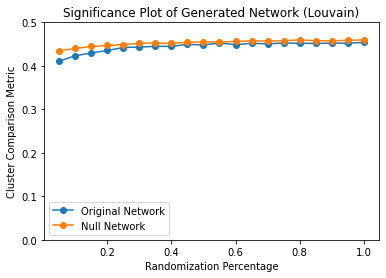

In [171]:
output_0 = robin_robust(graph=Gb_0, graph_random=Gr_0, method="louvain")
plot_0 = plot_robin(Gb_0, output_0["Mean"], output_0["MeanRandom"], legend=("Original Network", "Null Network"), title="Significance Plot of Generated Network (Louvain)")

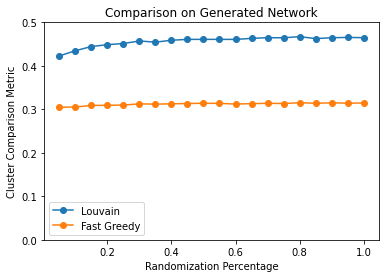

In [175]:
compare_output_0 = robin_compare(graph=Gb_0, method1="louvain", method2="fastgreedy")
plot_robin(Gb_0, compare_output_0["Mean1"], compare_output_0["Mean2"], legend=("Louvain", "Fast Greedy"), title="Comparison on Generated Network")

In [159]:
native_probs = [2/3, 1/6, 1/6]  # using suitable multinomial parameters for the 3-class case as discussed on page 5
n = 500  # grow graph to size of 5000 nodes
m = 15  # each node added connects to m other nodes
c = 3  # there are c classes

# tanh setting for degree-varying assortativity
tau = 15
tanh_c_probs = {k: {1: np.tanh(k/tau), 0: 1 - np.tanh(k/tau)} for k in range(100000)}

G_1, node_degrees, node_labels, intra_class, inter_class, ratio_tracker, alpha_tracker = cabam_graph_generation(n=n, 
                                                                                                              m=m, 
                                                                                                              c=c,
                                                                                                              native_probs=native_probs,
                                                                                                              c_probs=tanh_c_probs)

  0%|          | 0/500 [00:00<?, ?it/s]

In [186]:
Gb_1 = ig.Graph.from_networkx(G_1)
Gr_1 = random(Gb_1.copy())

print(Gb_1.density())
print(Gb_1.average_path_length())
print(Gb_1.transitivity_avglocal_undirected())
print(Gb_1.assortativity_degree())
print(Gb_1.diameter())

0.058316633266533066
2.2271583166332665
0.1599063548426607
0.031243850527811538
3


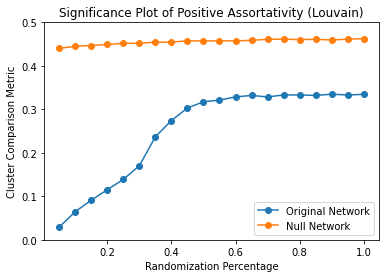

In [178]:
output_1 = robin_robust(graph=Gb_1, graph_random=Gr_1, method="louvain")
plot_1 = plot_robin(Gb_1, output_1["Mean"], output_1["MeanRandom"], legend=("Original Network", "Null Network"), title="Significance Plot of Positive Assortativity (Louvain)")

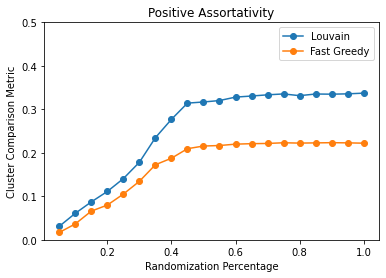

In [179]:
compare_output_1 = robin_compare(graph=Gb_1, method1="louvain", method2="fastgreedy")
plot_robin(Gb_1, compare_output_1["Mean1"], compare_output_1["Mean2"], legend=("Louvain", "Fast Greedy"), title="Positive Assortativity")

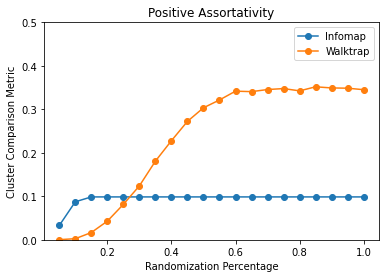

In [180]:
compare_output_1 = robin_compare(graph=Gb_1, method1="infomap", method2="walktrap")
plot_robin(Gb_1, compare_output_1["Mean1"], compare_output_1["Mean2"], legend=("Infomap", "Walktrap"), title="Positive Assortativity")

In [163]:
native_probs = [2/3, 1/6, 1/6]  # using suitable multinomial parameters for the 3-class case as discussed on page 5
n = 500  # grow graph to size of 5000 nodes
m = 15  # each node added connects to m other nodes
c = 3  # there are c classes

# tanh setting for degree-varying assortativity
tau = 5
tanh_c_probs = {k: {1: np.tanh(k/tau), 0: 1 - np.tanh(k/tau)} for k in range(100000)}

G_2, node_degrees, node_labels, intra_class, inter_class, ratio_tracker, alpha_tracker = cabam_graph_generation(n=n, 
                                                                                                              m=m, 
                                                                                                              c=c,
                                                                                                              native_probs=native_probs,
                                                                                                              c_probs=tanh_c_probs)

  0%|          | 0/500 [00:00<?, ?it/s]

In [187]:
Gb_2 = ig.Graph.from_networkx(G_2)
Gr_2 = random(Gb_2.copy())

print(Gb_2.density())
print(Gb_2.average_path_length())
print(Gb_2.transitivity_avglocal_undirected())
print(Gb_2.assortativity_degree())
print(Gb_2.diameter())

0.058316633266533066
2.438420841683367
0.27163051412380884
-0.00440954495458539
4


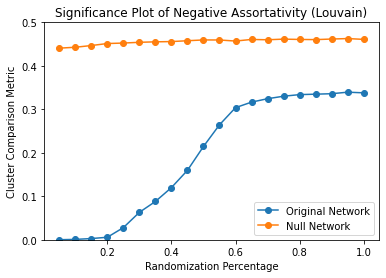

In [181]:
output_2 = robin_robust(graph=Gb_2, graph_random=Gr_2, method="louvain")
plot_2 = plot_robin(Gb_2, output_2["Mean"], output_2["MeanRandom"], legend=("Original Network", "Null Network"), title="Significance Plot of Negative Assortativity (Louvain)")

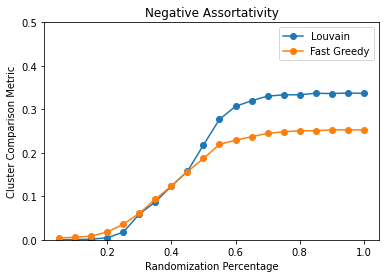

In [182]:
compare_output_2 = robin_compare(graph=Gb_2, method1="louvain", method2="fastgreedy")
plot_robin(Gb_2, compare_output_2["Mean1"], compare_output_2["Mean2"], legend=("Louvain", "Fast Greedy"), title="Negative Assortativity")

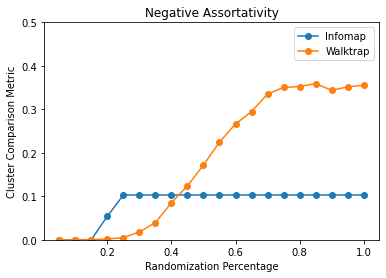

In [183]:
compare_output_2 = robin_compare(graph=Gb_2, method1="infomap", method2="walktrap")
plot_robin(Gb_2, compare_output_2["Mean1"], compare_output_2["Mean2"], legend=("Infomap", "Walktrap"), title="Negative Assortativity")